In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [87]:
marketplace_to_products = {}

kraken_pairs = requests.get('https://api.kraken.com/0/public/Assets').json()['result']
marketplace_to_products['kraken'] = set(kraken_pairs.keys()) | { p['altname'] for p in kraken_pairs.values() } | {'BTC'}

marketplace_to_products['gdax'] = { p['id'] for p in requests.get('https://api.gdax.com/currencies').json()}

marketplace_to_products['bitcoinde'] = { 'BCH', 'BTC', 'ETH', 'BTG', 'EUR' }

cex_pairs = requests.get('https://cex.io/api/currency_limits').json()['data']['pairs']
marketplace_to_products['cex'] = { p['symbol1'] for p in cex_pairs} | { p['symbol2'] for p in cex_pairs}

bitstamp_pairs = requests.get('https://www.bitstamp.net/api/v2/trading-pairs-info/').json()
marketplace_to_products['bitstamp'] = { p['name'][0:3] for p in bitstamp_pairs } | { p['name'][4:] for p in bitstamp_pairs }

import pprint
pprint.pprint(marketplace_to_products)

{'bitcoinde': {'BCH', 'BTC', 'ETH', 'BTG', 'EUR'},
 'bitstamp': {'XRP', 'BCH', 'BTC', 'USD', 'EUR', 'LTC', 'ETH'},
 'cex': {'BCH',
         'BTC',
         'BTG',
         'DASH',
         'ETH',
         'EUR',
         'GBP',
         'GHS',
         'RUB',
         'USD',
         'XLM',
         'XRP',
         'ZEC'},
 'gdax': {'BCH', 'BTC', 'USD', 'ETH', 'LTC', 'GBP', 'EUR'},
 'kraken': {'BCH',
            'BTC',
            'CAD',
            'DAO',
            'DASH',
            'EOS',
            'ETC',
            'ETH',
            'EUR',
            'FEE',
            'GBP',
            'GNO',
            'ICN',
            'JPY',
            'KFEE',
            'KRW',
            'LTC',
            'MLN',
            'NMC',
            'REP',
            'USD',
            'USDT',
            'XBT',
            'XDAO',
            'XDG',
            'XETC',
            'XETH',
            'XICN',
            'XLM',
            'XLTC',
            'XMLN',
            'XMR'

In [29]:
all_currencies = set()
for currencies in marketplace_to_products.values():
    all_currencies = all_currencies | currencies
    
print(sorted(all_currencies))

['BCH', 'BTC', 'BTG', 'CAD', 'DAO', 'DASH', 'EOS', 'ETC', 'ETH', 'EUR', 'FEE', 'GBP', 'GHS', 'GNO', 'ICN', 'JPY', 'KFEE', 'KRW', 'LTC', 'MLN', 'NMC', 'REP', 'RUB', 'USD', 'USDT', 'XBT', 'XDAO', 'XDG', 'XETC', 'XETH', 'XICN', 'XLM', 'XLTC', 'XMLN', 'XMR', 'XNMC', 'XREP', 'XRP', 'XVN', 'XXBT', 'XXDG', 'XXLM', 'XXMR', 'XXRP', 'XXVN', 'XZEC', 'ZCAD', 'ZEC', 'ZEUR', 'ZGBP', 'ZJPY', 'ZKRW', 'ZUSD']


In [32]:
df = pd.DataFrame([],index=all_currencies, columns=marketplace_to_products.keys())
for c in all_currencies:
    for k in marketplace_to_products.keys():
        df[k][c] = c in marketplace_to_products[k]


In [85]:
# filter all currencies that are found at at least 2 market places and remove GBP, USD:
top = df[df.sum(axis=1) >= 2].drop(['GBP', 'USD'])
print(top)

     kraken   gdax bitcoinde    cex bitstamp
BCH    True   True      True   True     True
BTC    True   True      True   True     True
ZEC    True  False     False   True    False
XLM    True  False     False   True    False
BTG   False  False      True   True    False
DASH   True  False     False   True    False
ETH    True   True      True   True     True
XRP    True  False     False   True     True
LTC    True   True     False  False     True
EUR    True   True      True   True     True


Text(0.5,1,'currencies per marketplace')

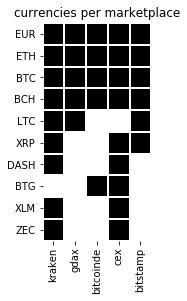

In [90]:
sort = top.sum(axis=1).sort_values(ascending=False).index
ax = sns.heatmap(top.loc[sort].astype(float), cmap='binary', linewidths=1, square=True, cbar=False)
ax.set_title('currencies per marketplace')